In [17]:
from TextClass.ClassifierCv import ClassifierCv
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings('ignore')

## Text classification

In [18]:
text=['i am happy', 'i very friendly','you are happy', 'you are friendly','we are friendly', 'you are bad',
      'i am bad','i am unhappy','you are unhappy', 'we are unhappy', 'so bad']
category=['pos','pos','pos','pos','pos','neg','neg','neg','neg','neg', 'neg']
data=pd.DataFrame({"text":text, "category":category})

In [19]:
data

,category,text
0,pos,i am happy
1,pos,i very friendly
2,pos,you are happy
3,pos,you are friendly
4,pos,we are friendly
5,neg,you are bad
6,neg,i am bad
7,neg,i am unhappy
8,neg,you are unhappy
9,neg,we are unhappy


#### initialize model object

In [20]:
cf_cv=ClassifierCv(data['category'],data['text'])

#### gridsearch

In [21]:
#model uses skleanr Pipeline object to process data
cf_cv.prepare_pipeline( [('vect', CountVectorizer()),
                          ('tfidf', TfidfTransformer()),
                          ('crf', MultinomialNB()) ])

param_dist = {'crf__alpha':[0.01, 0.02, 0.05, 0.07, 0.09]}

cf_cv.perform_random_search(param_dist)
cf_cv.print_top_random_search(3)

Model with rank: 1
Mean validation score: 0.806 (std: 0.119)
Parameters: {'crf__alpha': 0.01}

Model with rank: 1
Mean validation score: 0.806 (std: 0.119)
Parameters: {'crf__alpha': 0.02}

Model with rank: 3
Mean validation score: 0.661 (std: 0.269)
Parameters: {'crf__alpha': 0.05}

Model with rank: 3
Mean validation score: 0.661 (std: 0.269)
Parameters: {'crf__alpha': 0.07}

Model with rank: 3
Mean validation score: 0.661 (std: 0.269)
Parameters: {'crf__alpha': 0.09}



#### train model

if plot_path and metric_path are not None metrics files and plots will be saved

MEDIAN
0    0.595833
dtype: float64
MEAN
0    0.595833
dtype: float64


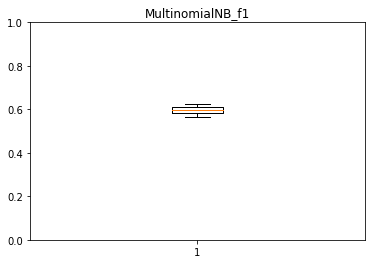

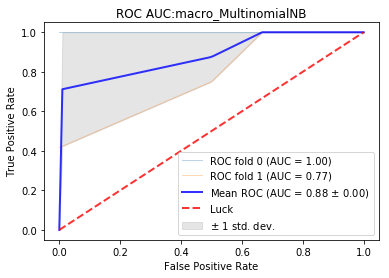

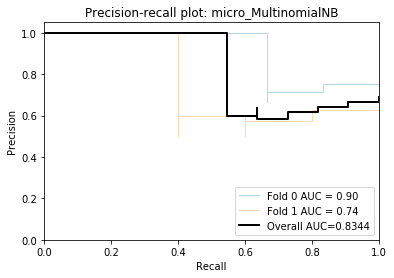

In [22]:
cf_cv.train_save_metrics([('vect', CountVectorizer()),
                          ('tfidf', TfidfTransformer()),
                          ('clf', MultinomialNB(alpha=.01)),], 
                         'f1', 
                         'MultinomialNB',
                        num_cv=2)

MEDIAN
pos    0.708333
neg    0.500000
dtype: float64
MEAN
pos    0.708333
neg    0.500000
dtype: float64


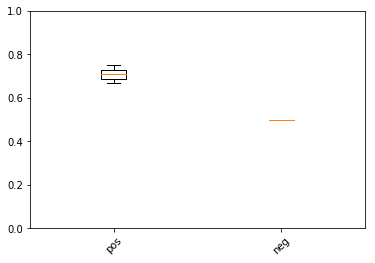

In [23]:
#per category metrics
cf_cv.make_metric_boxplot(metric='f1')

Confusion matrix, without normalization
[[5 0]
 [4 2]]


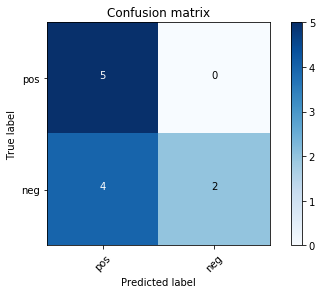

In [24]:
cf_cv.plot_confusion_matrix()

#### calculate accuracy using evaluation data

In [25]:
df_eval=pd.DataFrame({'text':['so good','very happy guy','very well unfriendly','it is bad'],
                     'category':['pos','pos','neg','neg']})

In [26]:
print(cf_cv.calc_evaluation_report(df_eval['text'], df_eval['category']))

             precision    recall  f1-score   support

        neg       0.50      0.50      0.50         2
        pos       0.50      0.50      0.50         2

avg / total       0.50      0.50      0.50         4



#### compare each class accuracy to number of samples 

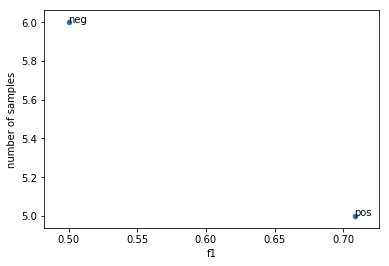

In [27]:
cf_cv.plot_acc_vs_nsamples()

## Fasttext

Most models implemented are from sklearn package. Only one which is not is FastText. FastText takes text as an input. Otherwise usage is similar to previous.

In [28]:
from TextClass.FasttextClassifier import FasttextClassifier

In [29]:
#model uses skleanr Pipeline object to process data
cf_cv.prepare_pipeline( [('crf', FasttextClassifier()) ])

param_dist = {'crf__epoch':[2,3,4]}

cf_cv.perform_random_search(param_dist)
cf_cv.print_top_random_search(3)

Model with rank: 1
Mean validation score: 0.661 (std: 0.269)
Parameters: {'crf__epoch': 2}

Model with rank: 1
Mean validation score: 0.661 (std: 0.269)
Parameters: {'crf__epoch': 3}

Model with rank: 1
Mean validation score: 0.661 (std: 0.269)
Parameters: {'crf__epoch': 4}



MEDIAN
0    0.466667
dtype: float64
MEAN
0    0.466667
dtype: float64


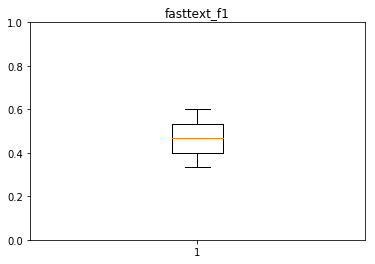

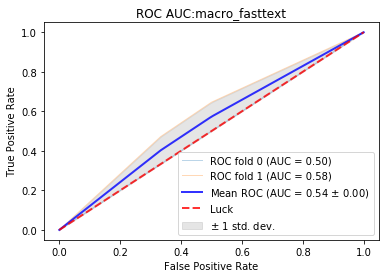

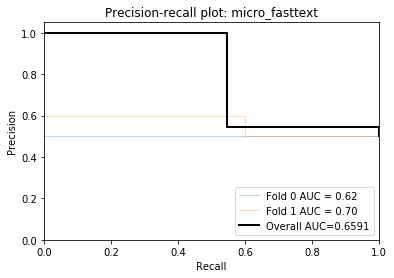

In [30]:
cf_cv.train_save_metrics([('clf', FasttextClassifier(epoch=4)),], 
                         'f1', 
                         'fasttext',
                        num_cv=2)